In [451]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [452]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

### Step 1: Reading and Understanding the Data
Let's start with the following steps:

Importing data using the pandas library and Understanding the structure of the data.

In [453]:
# Read the given CSV file, and view some sample records

df_bike_sharing = pd.read_csv("day.csv")
df_bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


1.1 - Let's inspect the various aspects of  dataframe

In [454]:
df_bike_sharing.shape

(730, 16)

In [455]:
df_bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


Observations:
    - index range is from 0 to 729 in a sequence integer number
    - data types looks correct except 'dteday' column (we will chnage datatype to date format)
    - We do nor have any null values in dataframe.

In [456]:
# columns name 
df_bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Data observation with given data dictionary : -
- Categorical columns:
    'season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit',
    
- Numarical columns:
    'temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt'
    

In [457]:
# all columns
df_bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [458]:
# as categorical columns are also having numerical data lets look only columns, which are truely 
# nemeric for model building process
df_bike_sharing[['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


1.2 - Data prepartion 
    - change datatype for dteday column
    - Assigning respective values to categorical columns

In [459]:
df_bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [460]:
df_bike_sharing.dteday = pd.to_datetime(df_bike_sharing.dteday)

In [461]:
df_bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null datetime64[ns]
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(11)
memory usage: 91.3 KB


In [462]:
df_bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


1.3 - Now after observation of all columns, lets convert categorical columns to respective values (as per data dictionary).

In [463]:
df_bike_sharing[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']].sample(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit
9,1,0,1,0,3,1,1
342,4,0,12,0,0,0,1
567,3,1,7,0,1,1,2
67,1,0,3,0,5,1,2
387,1,1,1,0,3,1,2
553,3,1,7,0,1,1,1
54,1,0,2,0,6,0,2
485,2,1,5,0,3,1,2
610,3,1,9,1,2,0,1
704,4,1,12,0,5,1,1


In [464]:
# season column 
df_bike_sharing.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [465]:
# mapping form data dictionary 
# season : season (1:spring, 2:summer, 3:fall, 4:winter)
df_bike_sharing[['season']] = df_bike_sharing[['season']].apply(lambda x: x.map({1:'spring',
                                            2:'summer',
                                            3:'fall',
                                            4:'winter'}))

# altername way 
# df_bike_sharing.season.apply(lambda x:'spring' if x ==1 else
#                                     'summer' if x ==2 else
#                                     'fall' if x ==3 else
#                                     'winter' if x ==4 else 'na'
#                             ) 

In [466]:
print(df_bike_sharing.season.value_counts())

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


In [467]:
# yr : year (0: 2018, 1:2019)
print(df_bike_sharing.yr.value_counts())
df_bike_sharing[['yr']] = df_bike_sharing[['yr']].apply(lambda x: x.map({0:2018,1:2019}))
print(df_bike_sharing.yr.value_counts())

1    365
0    365
Name: yr, dtype: int64
2019    365
2018    365
Name: yr, dtype: int64


In [468]:
# mnth : month ( 1 to 12)
print(df_bike_sharing.mnth.value_counts())
df_bike_sharing[['mnth']] = df_bike_sharing[['mnth']].apply(lambda x: x.map({1:'Jan',
                                            2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',
                                            8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'
                                                                            }))
print(df_bike_sharing.mnth.value_counts())

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
Dec    62
Aug    62
May    62
Mar    62
Jul    62
Jan    62
Oct    62
Sep    60
Apr    60
Jun    60
Nov    60
Feb    56
Name: mnth, dtype: int64


In [469]:
# holiday : weather day is a holiday or not
print(df_bike_sharing.holiday.value_counts())
# holiday column is good for model input

0    709
1     21
Name: holiday, dtype: int64


In [470]:
# weekday : day of the week
print(df_bike_sharing.weekday.value_counts())
df_bike_sharing[['weekday']] = df_bike_sharing[['weekday']].apply(lambda x: x.map({1:'Mon',
                                            2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'}))
print(df_bike_sharing.weekday.value_counts())

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sun    104
Sat    104
Name: weekday, dtype: int64


In [471]:
# workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
print(df_bike_sharing.workingday.value_counts())
# workingday column is good for model input

1    504
0    226
Name: workingday, dtype: int64


In [472]:
# weathersit : - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
#               - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
#               - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
#               - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
print(df_bike_sharing.weathersit.value_counts())
df_bike_sharing[['weathersit']] = df_bike_sharing[['weathersit']].apply(lambda x: x.map({1:'Clear, Few clouds, Partly cloudy, Partly cloudy',
                                            2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                            3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ',
                                            4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}))
print(df_bike_sharing.weathersit.value_counts())

1    463
2    246
3     21
Name: weathersit, dtype: int64
Clear, Few clouds, Partly cloudy, Partly cloudy                                             463
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                246
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds      21
Name: weathersit, dtype: int64


In [473]:
# now lets see datframe 
df_bike_sharing.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
592,593,2019-08-16,fall,2019,Aug,0,Fri,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",29.485847,32.73440,51.9167,9.500332,1338,6267,7605
443,444,2019-03-20,spring,2019,Mar,0,Wed,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",22.994153,26.92665,80.7917,8.125157,1051,5042,6093
44,45,2018-02-14,spring,2018,Feb,0,Wed,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",17.015000,19.91750,37.5833,27.999836,208,1705,1913
192,193,2018-12-07,fall,2018,Jul,0,Thu,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",32.560847,36.96375,55.9167,13.417018,662,3596,4258
589,590,2019-08-13,fall,2019,Aug,0,Tue,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",29.554153,33.11270,54.5417,9.126204,1207,5676,6883


In [474]:
df_bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null datetime64[ns]
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(7), object(4)
memory usage: 91.3+ KB


### Step 2: Visualising the Data
Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to target variable `cnt`.

In [475]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [476]:
df_bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

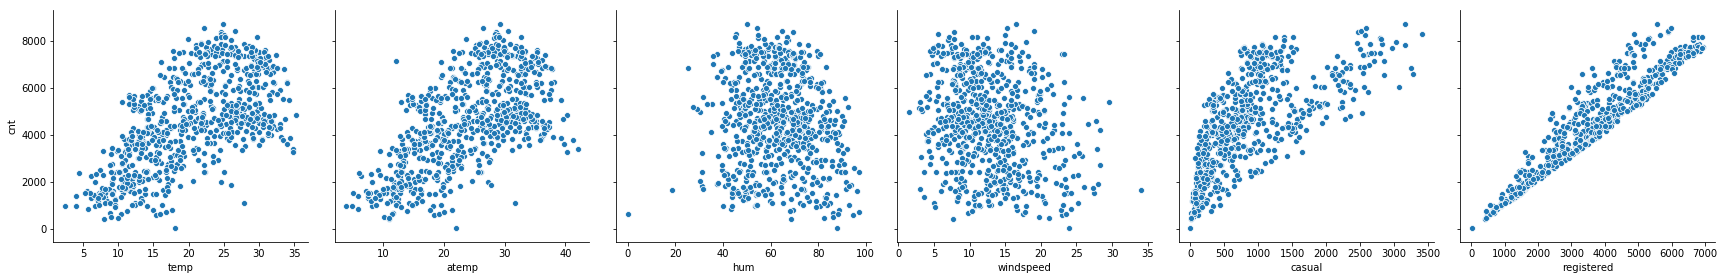

In [477]:
# see correlation between targett and numeric variables.
sns.pairplot(df_bike_sharing, x_vars=['temp', 'atemp', 'hum', 'windspeed','casual', 'registered'],
             y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

inferences:
    - casual and registered column are linear corelated with target variable cnt, other columns are     pretty scarrted.

In [478]:
df_bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

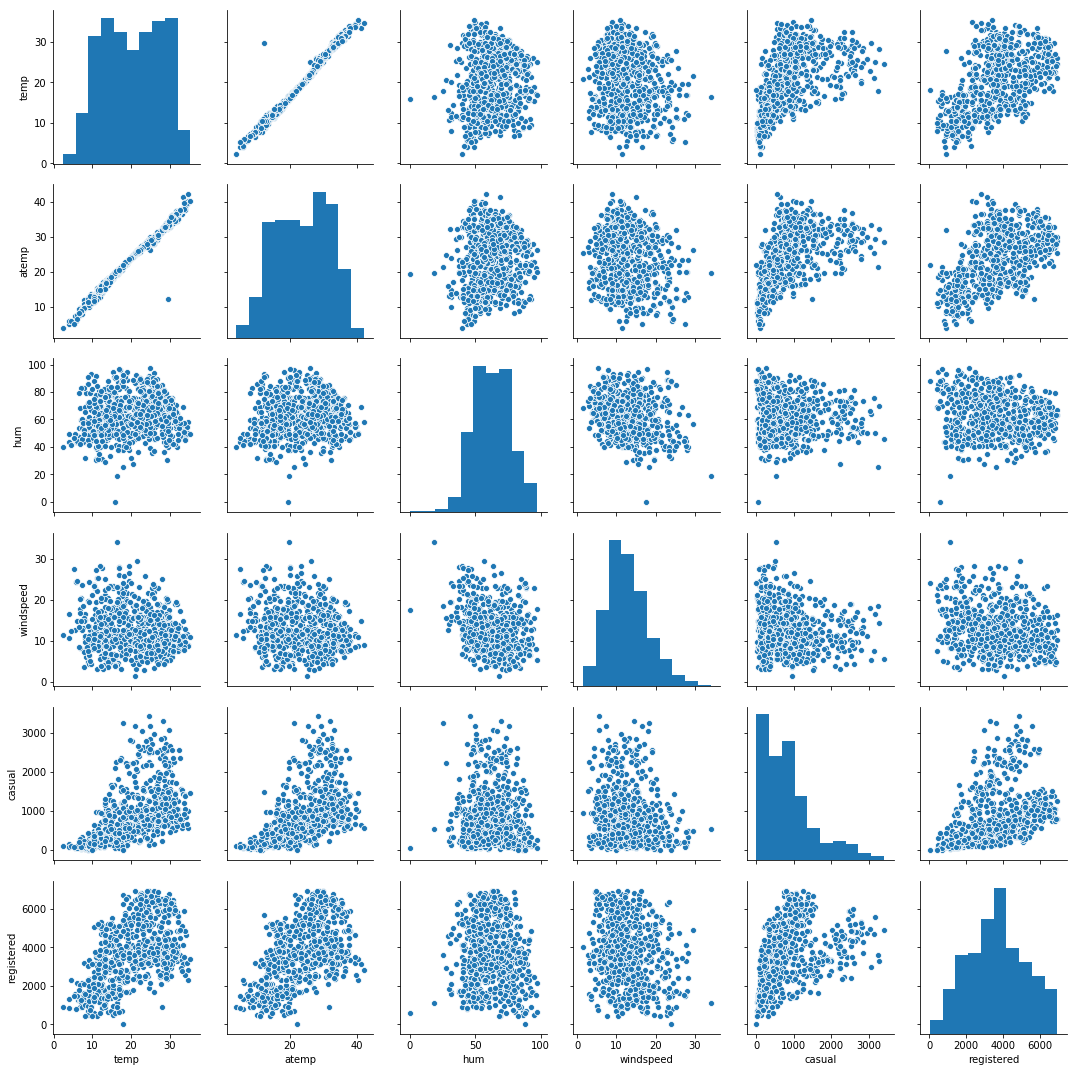

In [479]:
# Visualize independent numreic variable to observe correlation between them.
# if we see high correlation we can remove one of the variable to avoid multicolinarity.
sns.pairplot(df_bike_sharing[['temp', 'atemp', 'hum', 'windspeed','casual', 'registered']])
plt.show();

inference:
    - temp and atemp are highly correlated with each other

In [480]:
# Correlation Matrix
cor = df_bike_sharing[['temp', 'atemp', 'hum', 'windspeed','casual', 'registered']].corr()
cor

,temp,atemp,hum,windspeed,casual,registered
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000


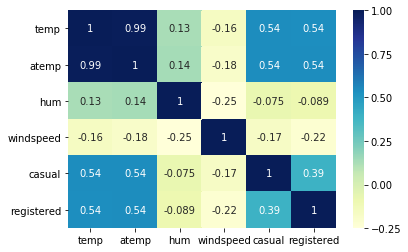

In [481]:
sns.heatmap(cor,annot=True,cmap="YlGnBu")
plt.show()

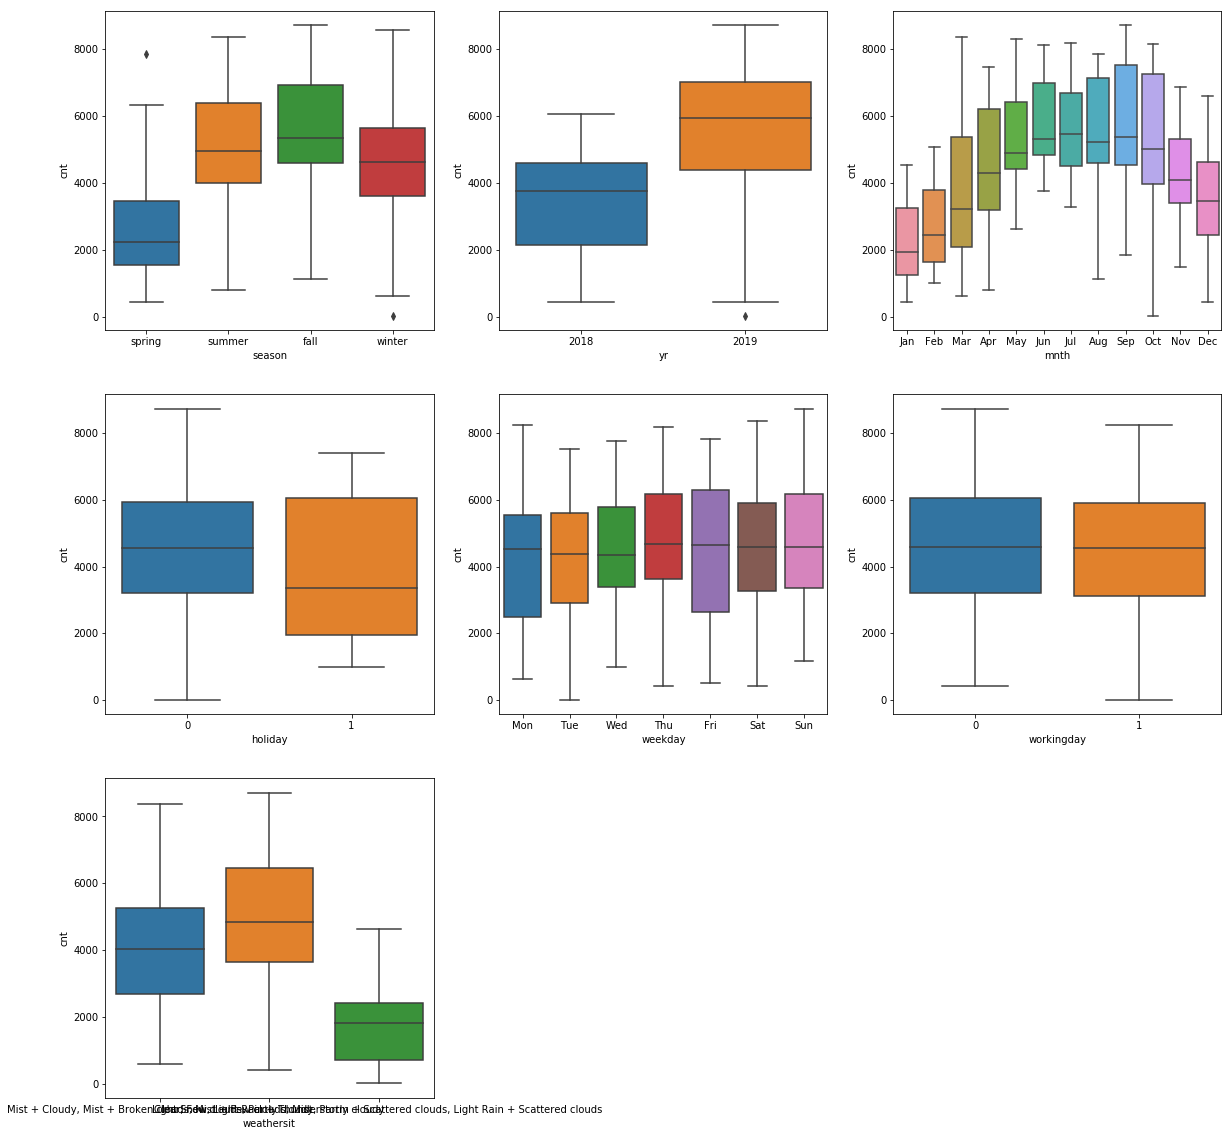

In [482]:
# Visualize all the Categorical Columns
df_categorical_var = df_bike_sharing[['season','yr','mnth', 'holiday','weekday','workingday', 'weathersit','cnt']]
    
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season',y='cnt',data=df_categorical_var)

plt.subplot(3,3,2)
sns.boxplot(x = 'yr',y='cnt',data=df_categorical_var)

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth',y='cnt',data=df_categorical_var)

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday',y='cnt',data=df_categorical_var)

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday',y='cnt',data=df_categorical_var)

plt.subplot(3,3,6)
sns.boxplot(x = 'workingday',y='cnt',data=df_categorical_var)

plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit',y='cnt',data=df_bike_sharing)

plt.show()

inferences:
    - We have few outliers in season and yr column, rest all variable looks good for mdoel.(for now ignoring these outliers)

In [483]:
# Validate if we need to convert any columns numeric for further analysis
df_bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null datetime64[ns]
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(7), object(4)
memory usage: 91.3+ KB


In [484]:
# all columns datatype looks good for further processing

### Step 3: Data Preparation

In [485]:
df_bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,0,Mon,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,0,Tue,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,0,Wed,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,0,Thu,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,0,Fri,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert categorical variables to 1 and 0.

Following are the categorical variables:
    - season
    - yr
    - mnth
    - holiday
    - weekday
    - workingday
    - weathersit

In [486]:
# lets look there variables one-by-one

In [487]:
df_bike_sharing.season.value_counts(dropna=False)

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [488]:
df_bike_sharing.season.value_counts(dropna=False)

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [489]:
df_bike_sharing.yr.value_counts(dropna=False)

2019    365
2018    365
Name: yr, dtype: int64

df_bike_sharing.yr variable have only two values, so lets convert this in to 0 and 1.

In [490]:
df_bike_sharing[['yr']] = df_bike_sharing[['yr']].apply(lambda x: x.map({2018: 0,2019: 1}))
df_bike_sharing.yr.value_counts(dropna = False)

1    365
0    365
Name: yr, dtype: int64

In [491]:
df_bike_sharing.mnth.value_counts(dropna=False)

Dec    62
Aug    62
May    62
Mar    62
Jul    62
Jan    62
Oct    62
Sep    60
Apr    60
Jun    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [492]:
df_bike_sharing.holiday.value_counts(dropna=False)

0    709
1     21
Name: holiday, dtype: int64

In [493]:
df_bike_sharing.weekday.value_counts(dropna=False)

Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sun    104
Sat    104
Name: weekday, dtype: int64

In [494]:
df_bike_sharing.workingday.value_counts(dropna=False)

1    504
0    226
Name: workingday, dtype: int64

In [495]:
df_bike_sharing.weathersit.value_counts(dropna=False)

Clear, Few clouds, Partly cloudy, Partly cloudy                                             463
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                246
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds      21
Name: weathersit, dtype: int64

In [496]:
df_bike_sharing.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
620,621,2019-09-13,fall,1,Sep,0,Fri,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",25.112500,28.97790,63.7083,5.542294,1054,6750,7804
171,172,2018-06-21,fall,0,Jun,0,Thu,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",27.914153,31.88230,77.0417,11.458675,774,4061,4835
489,490,2019-05-05,summer,1,May,0,Sun,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",25.488347,29.23040,75.6667,10.250464,2496,4387,6883
445,446,2019-03-22,summer,1,Mar,0,Fri,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",22.720847,26.57835,83.1250,7.876654,1334,5537,6871
104,105,2018-04-15,summer,0,Apr,1,Sun,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",18.313347,22.09565,67.1250,15.167125,642,2484,3126


Inferences:
    - Column `yr`, `holiday`, and `workingday` are having 0 and 1, so these variable will be good for model
    - now lets consider remaining columns (`season`, `mnth`, `workingday`, and `weathersit`) to convert 
    in to numeric columns with dummy variable (one ot encoding) method.

In [497]:
df_bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [498]:
# Categorical vvariables
df_categorical = df_bike_sharing[['season', 'mnth','weekday','weathersit']]
# df_categorical = df_bike_sharing[['season','weathersit']]
print(df_categorical.columns)
df_categorical.sample(5)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


,season,mnth,weekday,weathersit
585,fall,Aug,Fri,"Clear, Few clouds, Partly cloudy, Partly cloudy"
397,spring,Feb,Sat,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
70,spring,Mar,Mon,"Clear, Few clouds, Partly cloudy, Partly cloudy"
192,fall,Jul,Thu,"Clear, Few clouds, Partly cloudy, Partly cloudy"
626,fall,Sep,Thu,"Clear, Few clouds, Partly cloudy, Partly cloudy"


In [499]:
# Lets do OHE by using the get_dummies()
# using `drop_first = Ture` only for 'weekday', where we can see if 6 days flags is 0 mean its the seventh day such as Sunday.
# and removing first column is more significiant where we have general value, for example Gender (as M and F) and result (as pass or fail)., 
# rest column would like to retain all variables.
df_dummies = df_categorical[['season', 'mnth','weathersit']]
for i in df_dummies.columns:
    if len(df_dummies.groupby([i]).size()) > 2: # where we have more then two value for a variable
        print(i)
        df_dummies = pd.get_dummies(df_dummies, prefix=[i], columns=[i])
        
# print(df_dummies.columns)

df_dummies = pd.concat([df_dummies,df_categorical[['weekday']]], axis=1)
# print(df_dummies.columns)

df_dummies = pd.get_dummies(df_dummies, drop_first=True)
# print(df_dummies.columns)

season
mnth
weathersit


In [500]:
df_dummies.sample(5)

,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,mnth_Sep,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
127,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
72,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
688,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
579,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
130,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [501]:
# delete categorical variable from dataframe, before cancatenating with dummy variable dataframe
df_bike_sharing = df_bike_sharing.drop(['season', 'mnth','weekday','weathersit'],axis=1)
print(df_bike_sharing.columns)

df_bike_sharing = pd.concat([df_bike_sharing,df_dummies], axis=1)
print(df_bike_sharing.columns)

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')
Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season_fall',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Apr',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')


In [502]:
len(df_bike_sharing.columns) # see the total number of columns

37

In [503]:
# Observe other numerical variables
df_bike_sharing[['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']].sample(5)

,temp,atemp,hum,windspeed,casual,registered,cnt
358,11.266103,13.99805,68.1304,10.391097,303,451,754
592,29.485847,32.73440,51.9167,9.500332,1338,6267,7605
474,21.593347,25.78875,69.4583,10.041357,1340,5950,7290
469,24.873347,28.69375,50.7917,15.083643,2846,4286,7132
80,18.108347,22.03210,62.4583,15.125250,460,2243,2703


Inferences:
- After observing above table, it clearly look `cnt` is sum of `casual` and `registered` variable, so its better to remove these variable from out analysis. but for lets keep these columns and wil remove it in 
    feature selection process.

In [504]:
# df_bike_sharing = df_bike_sharing.drop(['casual','registered'], axis = 1)
print(df_bike_sharing.columns)

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season_fall',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Apr',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')


In [505]:
df_bike_sharing.sample(5)

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_Sep,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
528,529,2019-06-13,1,0,1,26.889153,30.55585,58.2083,22.999693,1173,...,0,1,0,0,0,0,0,1,0,0
387,388,2019-01-23,1,0,1,8.951653,12.15290,91.1250,7.417436,145,...,0,0,0,1,0,0,0,0,0,1
469,470,2019-04-15,1,0,1,24.873347,28.69375,50.7917,15.083643,2846,...,0,1,0,0,1,0,0,0,0,0
181,182,2018-01-07,0,0,0,29.622500,32.60810,39.6250,6.874736,1246,...,0,1,0,0,0,0,1,0,0,0
297,298,2018-10-25,0,0,1,19.338347,23.16875,62.2917,11.166086,695,...,0,1,0,0,0,0,0,1,0,0


drop `instant` and `dteday` variable as `instant` is a sequence and will not help for model and `dteday` is a date, we can use this to derive few insights but we have good enough other feature for model. so lets go ahead and remove these two columns

In [506]:
df_bike_sharing = df_bike_sharing.drop(['dteday','instant'], axis= 1)
df_bike_sharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_fall', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Apr', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [507]:
df_bike_sharing.shape

(730, 35)

In [508]:
df_bike_sharing.sample(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Sep,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
46,0,0,1,13.048701,15.8100,42.3478,16.869997,218,1897,2115,...,0,1,0,0,0,0,0,0,0,0
520,1,0,1,22.174153,26.2946,61.3333,14.041525,968,6033,7001,...,0,0,0,1,0,0,0,0,0,1
499,1,0,1,25.078347,28.8202,79.4583,9.875264,625,4490,5115,...,0,0,0,1,0,0,0,0,0,1
50,0,0,1,11.693897,13.8665,40.7826,14.956745,639,1173,1812,...,0,1,0,0,0,0,0,0,1,0
80,0,0,1,18.108347,22.0321,62.4583,15.125250,460,2243,2703,...,0,1,0,0,0,0,0,1,0,0


### Step 4: Splitting the Data into Training and Testing Sets

In [509]:
# Lets train-test split.
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [510]:
print(df_train.shape)
print(df_test.shape)

(510, 35)
(219, 35)


Rescaling the Features

In [511]:
# Observe other numerical variables
df_bike_sharing[['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']].sample(5)

,temp,atemp,hum,windspeed,casual,registered,cnt
196,28.153347,31.91315,58.5000,13.958914,2418,3505,5923
187,30.750000,34.34355,65.1250,10.666400,754,3838,4592
14,9.566653,12.40560,49.8750,10.583521,222,1026,1248
31,7.879134,11.72650,82.9565,3.565271,47,1313,1360
390,14.008347,17.80250,76.9583,4.917519,244,3831,4075


In [512]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [513]:
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [514]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Sep,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,...,0,1,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,1,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,...,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,...,0,1,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,0,0,1,0,0,1,0,0,0


In [515]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Sep,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620,...,0.080392,0.627451,0.029412,0.343137,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593,...,0.272166,0.483958,0.169124,0.475223,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


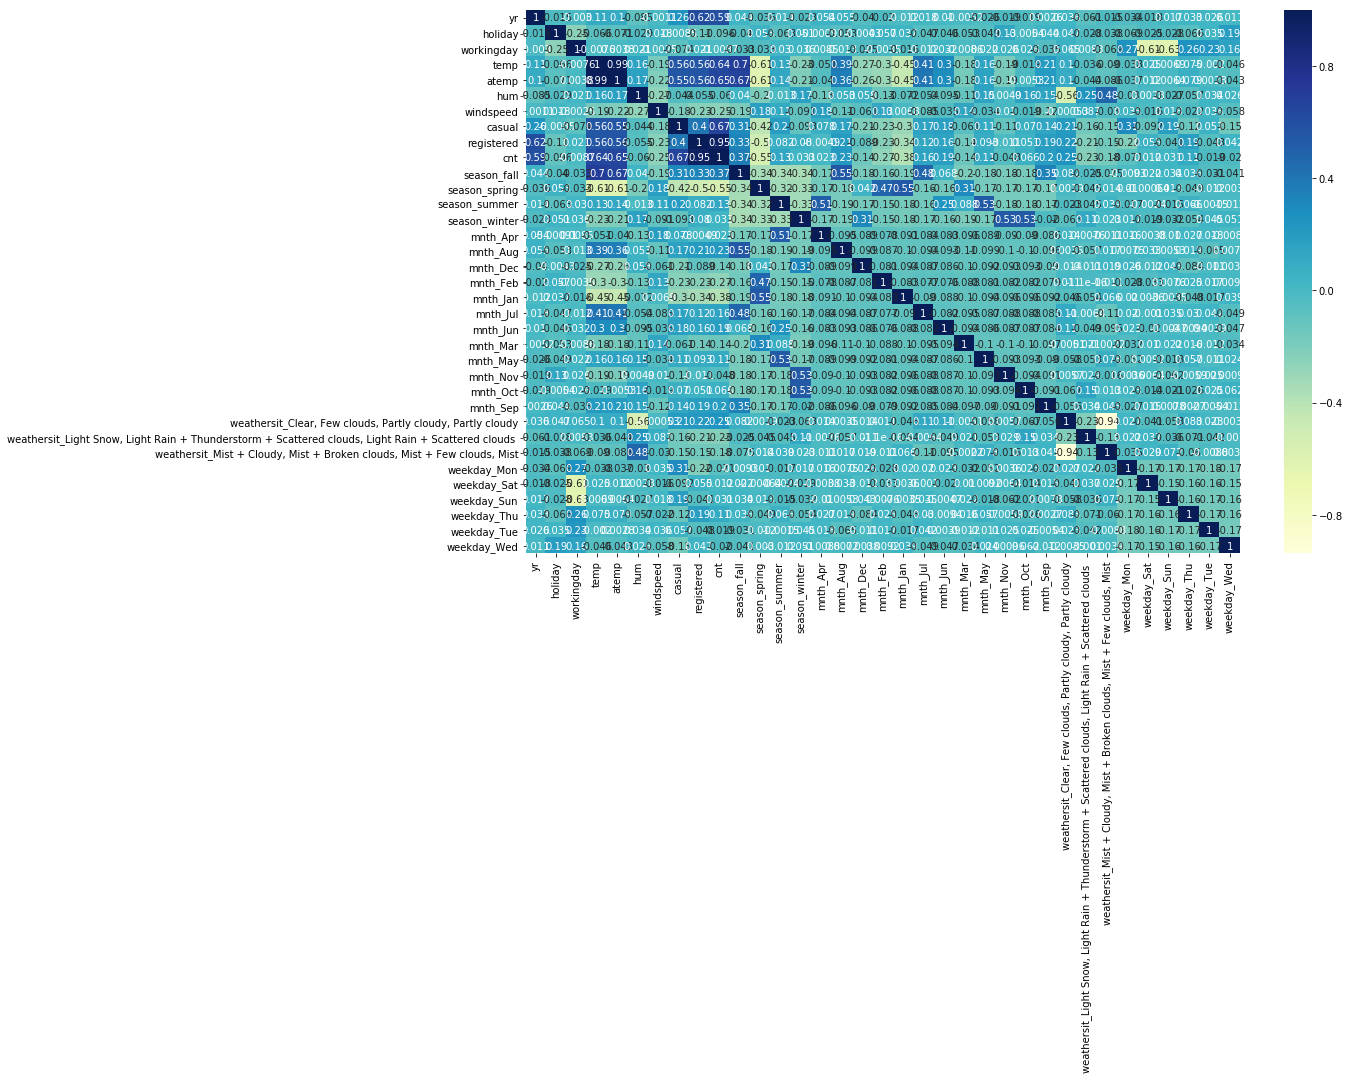

In [516]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Step 5- Feature Selection and Building Model

In [517]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [518]:
#Build a linear model
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

lr= sm.OLS(y_train, X_train_lm).fit()

lr.params

const                                                                                                 -2.953367e-16
yr                                                                                                    -3.282964e-16
holiday                                                                                                1.073360e-16
workingday                                                                                            -5.312591e-17
temp                                                                                                  -1.193490e-15
atemp                                                                                                  2.463307e-16
hum                                                                                                    1.422473e-16
windspeed                                                                                              4.336809e-17
casual                                                                  

In [519]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.658e+30
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:43:27   Log-Likelihood:                 17205.
No. Observations:                 510   AIC:                        -3.435e+04
Df Residuals:                     478   BIC:                        -3.421e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).
Maybe we could drop some?
We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [520]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [521]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,mnth_Jan,inf
26,"weathersit_Light Snow, Light Rain + Thundersto...",inf
24,mnth_Sep,inf
23,mnth_Oct,inf
22,mnth_Nov,inf
21,mnth_May,inf
20,mnth_Mar,inf
19,mnth_Jun,inf
18,mnth_Jul,inf
16,mnth_Feb,inf


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [522]:
#Dropping the variable and updating the model.
X = X_train[['yr','casual','weekday_Mon','weekday_Tue','weekday_Wed','weekday_Thu','hum','windspeed']]

In [523]:
# Build a fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [524]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     175.5
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          5.24e-140
Time:                        11:43:28   Log-Likelihood:                 379.12
No. Observations:                 510   AIC:                            -740.2
Df Residuals:                     501   BIC:                            -702.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3427      0.032     10.699      

In [525]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,5.40
7,windspeed,3.49
1,casual,3.01
0,yr,2.20
2,weekday_Mon,1.51
3,weekday_Tue,1.38
4,weekday_Wed,1.31
5,weekday_Thu,1.31


Dropping the Variable and Updating the Model
As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `hum` has a significantly high VIF (5.4) and a high p-value (0.219) as well. Hence, this variable isn't of much use and should be dropped.

In [526]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('hum', axis=1)

In [527]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [528]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     200.2
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          7.58e-141
Time:                        11:43:28   Log-Likelihood:                 378.35
No. Observations:                 510   AIC:                            -740.7
Df Residuals:                     502   BIC:                            -706.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3083      0.016     19.851      

Looking at some key statistics from the summary - 

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

In [529]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,casual,2.54
6,windspeed,2.32
0,yr,2.17
2,weekday_Mon,1.50
3,weekday_Tue,1.33
5,weekday_Thu,1.23
4,weekday_Wed,1.20


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

#### Step 5 -  Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [530]:
y_train_cnt = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

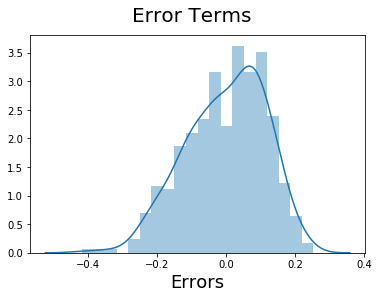

In [531]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Step 6 - Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

Applying the scaling on the test sets

In [532]:
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [533]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Sep,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.546312,0.530942,0.508750,0.418870,0.254916,0.505149,0.516216,...,0.086758,0.652968,0.027397,0.319635,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.188034,0.481313,0.249189,0.228159,0.201253,0.188111,0.209581,0.235390,0.238702,...,0.282125,0.477117,0.163612,0.467403,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.096295,0.323690,0.359882,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.213761,0.504523,0.520241,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.347251,0.653774,0.682487,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [534]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [535]:
# Adding constant variable to test dataframe
X_test_m3 = sm.add_constant(X_test)

In [537]:
# Creating X_test_m3 dataframe with variable used to develpo model and taking constant variable as well
X_test_m3 = X_test_m3[['const','yr', 'casual', 'weekday_Mon', 'weekday_Tue', 'weekday_Wed','weekday_Thu','windspeed']]

In [538]:
X_test_m3.columns

Index(['const', 'yr', 'casual', 'weekday_Mon', 'weekday_Tue', 'weekday_Wed',
       'weekday_Thu', 'windspeed'],
      dtype='object')

In [539]:
# Making predictions using the third model
y_pred_m3 = lr_3.predict(X_test_m3)

#### Step 6: Model Evaluation

Text(0, 0.5, 'y_pred')

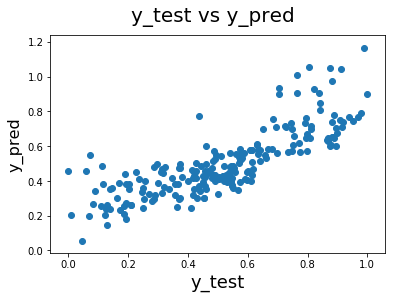

In [540]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m3)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [ ]:
We can see that this is the of our best fitted line.